In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [7]:
# Read the images to be aligned
im11 =  cv2.imread("1a.jpg");
im21 =  cv2.imread("1b.jpg");

# Convert images to grayscale
im1_gray = cv2.cvtColor(im11,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im21,cv2.COLOR_BGR2GRAY)

# Find size of image1
sz = im11.shape

# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION

# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)

# Specify the number of iterations.
number_of_iterations = 200;

# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;

# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria,inputMask=None,gaussFiltSize=5)
print(warp_matrix)
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    im2_aligned = cv2.warpPerspective (im2_gray, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2_gray, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);

# Show final results
#cv2.imshow("Image 1", im1)
#cv2.imshow("Image 2", im2)
#cv2.imshow("Aligned Image 2", im2_aligned)
#cv2.waitKey(0)


[[  1.          0.        -49.30409  ]
 [  0.          1.         -4.6715164]]


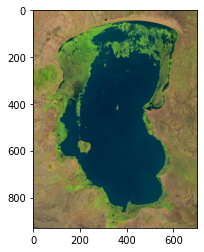

In [8]:
plt.imshow(im11[:,:,::-1])

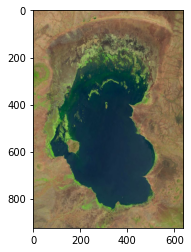

In [9]:
plt.imshow(im21[:,:,::-1])

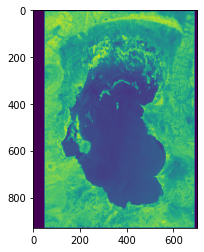

In [10]:
plt.imshow(im2_aligned)

In [11]:
fused = np.zeros_like(im11)

In [12]:
fused[:,:,0] = im1_gray
fused[:,:,1] = im2_aligned

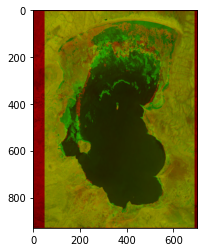

In [13]:
plt.imshow(fused)

In [14]:
j=fused[:,:,0]

In [28]:
fused.shape

(930, 703, 3)

In [29]:
cv2.imwrite('fused.jpg',fused[:,:,::-1])

True

In [18]:
fused

array([[[128,   0,   0],
        [133,   0,   0],
        [134,   0,   0],
        ...,
        [120,   0,   0],
        [122,   0,   0],
        [122,   0,   0]],

       [[128,   0,   0],
        [133,   0,   0],
        [134,   0,   0],
        ...,
        [117,   0,   0],
        [118,   0,   0],
        [117,   0,   0]],

       [[128,   0,   0],
        [132,   0,   0],
        [133,   0,   0],
        ...,
        [116,   0,   0],
        [116,   0,   0],
        [114,   0,   0]],

       ...,

       [[ 85,   0,   0],
        [ 85,   0,   0],
        [ 89,   0,   0],
        ...,
        [103,   0,   0],
        [100,   0,   0],
        [101,   0,   0]],

       [[ 89,   0,   0],
        [ 87,   0,   0],
        [ 88,   0,   0],
        ...,
        [106,   0,   0],
        [105,   0,   0],
        [104,   0,   0]],

       [[ 89,   0,   0],
        [ 88,   0,   0],
        [ 92,   0,   0],
        ...,
        [106,   0,   0],
        [105,   0,   0],
        [104,   0,   0]]